In [20]:
import numpy as np
from scipy.stats import norm
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
def plot_distribution(distribution, color=None):
    px = pd.Series(distribution)
    px = pd.cut(px, 100)
    px = px.value_counts().sort_index() / len(px)
    px.index = px.index.map(lambda x: x.left).values.astype(np.float32)
    plt.plot(px.index, px.values, c=color)
    plt.grid()
    plt.xlabel('k')
    plt.ylabel('P(X=k)')
size = 10000

## 正規分布
$$f(x) = \frac{1}{\sqrt{2\pi}\sigma }\exp(-\frac{(x-\mu)^2}{2\sigma^2})$$
期待値は$\mu$，分散は$\sigma^2$となる．  
線形性を有する: $\sum_i N(\mu_i, \sigma_i^2) \sim N(\sum_i \mu_i, \sum_i, \sigma_i^2)$

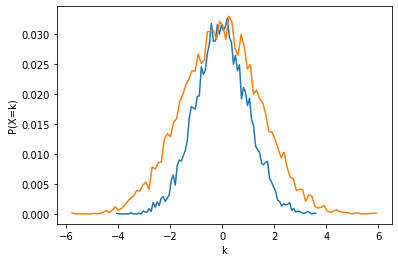

In [22]:
# arguments: (mu, sigma) sigma is std, not var
plot_distribution(np.random.normal(0,1,size))
plot_distribution(np.random.normal(0,1.5,size))
plt.show()

### 正規分布の標準化
正規分布に従うデータを$z=\frac{X-\mu}{\sigma}$で正規化すると，標準正規分布に従う．

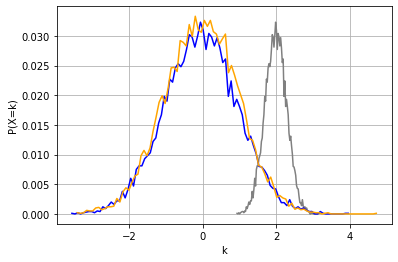

In [27]:
mu, sigma = 2,0.3
x = pd.Series(np.random.normal(mu,sigma,size))
# plot before regularization
plot_distribution(x, color='gray')
# regularization
x = x.map(lambda x: (x-mu)/sigma)
# plot after regularization
plot_distribution(x, color='blue')
# plot true N(0,1)
plot_distribution(np.random.normal(0,1,size), color='orange')

### 標準正規分布に従う値がある範囲になる確率
$P(Z \geq z)$を求める．

In [47]:
mu, sigma = 72.8, 15
target = 88
target_norm = (88 - mu) / sigma

# 分布を生成
px = np.random.normal(0, 1, size)
px = pd.cut(px, 100)
px = px.value_counts().sort_index() / len(px)
px.index = px.index.map(lambda x: x.left).values.astype(np.float32)

# 目的の範囲を抽出して面積を求める
probability = px[px.index>target_norm].sum()

print('probability above {}: {:.1f}%'.format(target, probability*100))

probability above 88: 15.4%
